In [ ]:
## 7.8 시계열 분석
# 시계열 분해는 추세(시간적 요인), 계절성(외부요인), 잔차(불규칙요인)이 있다.

## 시계열 분해 과정
# (1) 모형판단 : 시계열 데이터를 보고 추세와 계절성이 별개로 존배한다면 Additive 모형을 선택하고, 추세에 따라 계절성이 있다면 Multiplicative 모형을 적용한다.

In [23]:
import pandas as pd
import warnings

data = pd.read_csv('C:/adp/data/arima_data.csv', names = ['day', 'price'])
data.head()

,day,price
0,2013-01-01,3794
1,2013-02-01,3863
2,2013-03-01,5190
3,2013-04-01,5783
4,2013-05-01,6298


In [24]:
data.info()
# day 변수 type이 objec여서 날짜 형식으로 변경 필요
data['day'] = pd.to_datetime(data['day'],format="%Y-%m-%d")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   day     60 non-null     object
 1   price   60 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


In [25]:
# 시계열 분석시에는 날짜는 index로 변경하여 시계열 데이터의 값을 단일 column으로 만들어야 함
data.set_index('day', inplace=True)
data.head(3)

,price
day,
2013-01-01,3794
2013-02-01,3863
2013-03-01,5190


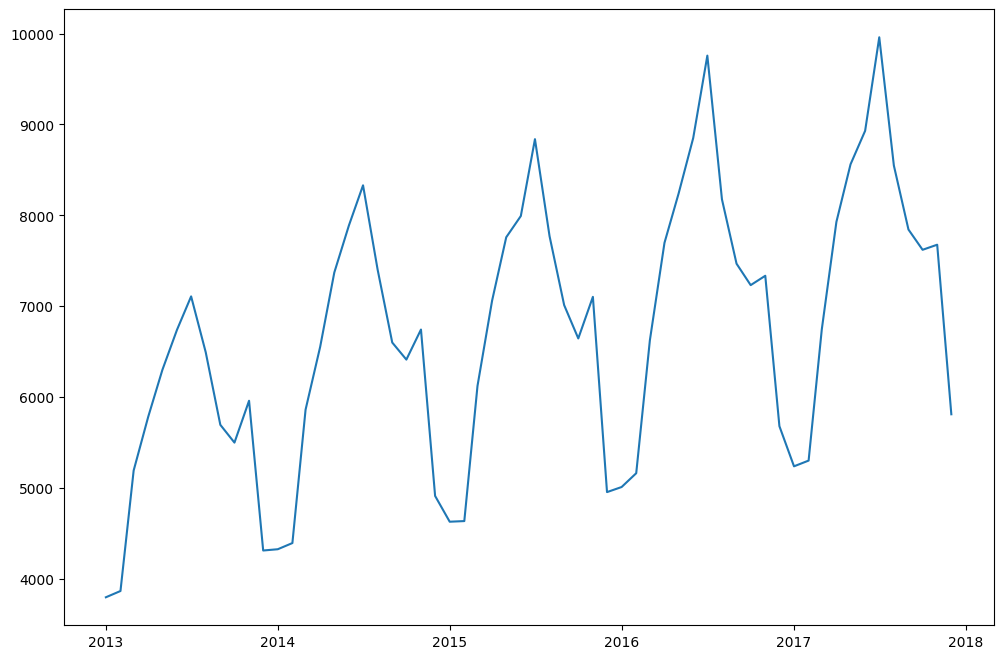

In [26]:
import matplotlib.pyplot as plt
plt.plot(data.index,data['price'])
# 추세에 따라 계절성이 존재하는것으로 보임

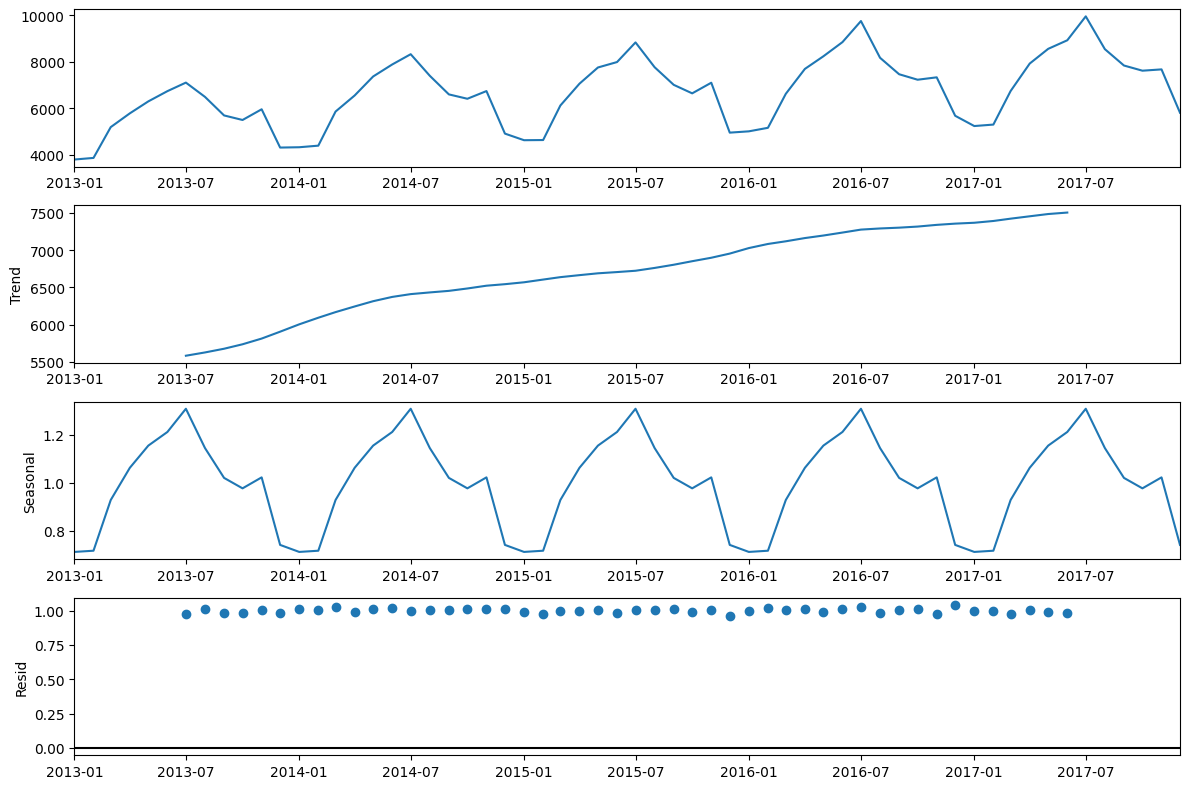

In [27]:
from statsmodels.tsa.seasonal import seasonal_decompose

ts = data
result = seasonal_decompose(ts, model='multiplicative')
plt.rcParams['figure.figsize'] = [12, 8]
result.plot()
plt.show()

In [28]:
## 7.8.2 정상성 변환
# 정상성 : 평균, 분산이 시간에 따라 일정한 성질을 가짐.
# 추세나 계절성이 있는 시계열은 정상 시계열이 아니며 변환을 통해서 정상 시계열로 변환해주어야 한다.
# 변환의 방법에는 로그 변환과 차분이 있음.
# 로그변환은 분산(변동폭)이 일정하지 않은 경우에 사용.
# 차분은 추세, 계절성이 존재하는 경우에 사용. (전일자의 데이터는 - 해주어 데이터의 증감을 나타내는 데이터)

In [29]:
## 정상성 검증
# 귀무가설 : 데이터가 정상성을 갖지 않는다.
# 대립가설 : 데이터가 정상성을 갖는다.

In [30]:
from statsmodels.tsa.stattools import adfuller

#Train, Test 데이터 구분
training = data[:"2016-12-01"]
test = data.drop(training.index)


adf = adfuller(training, regression='ct')
print('ADF Statistic: {}'.format(adf[0]))
print('p-value : {}'.format(adf[1]))
# p-value 0.6으로 유의수준 0.05보다 높으므로 정상성을 갖지 않는다고 볼 수 있음. 

ADF Statistic: -1.9997199341327634
p-value : 0.6015863303794268


<AxesSubplot:xlabel='day'>

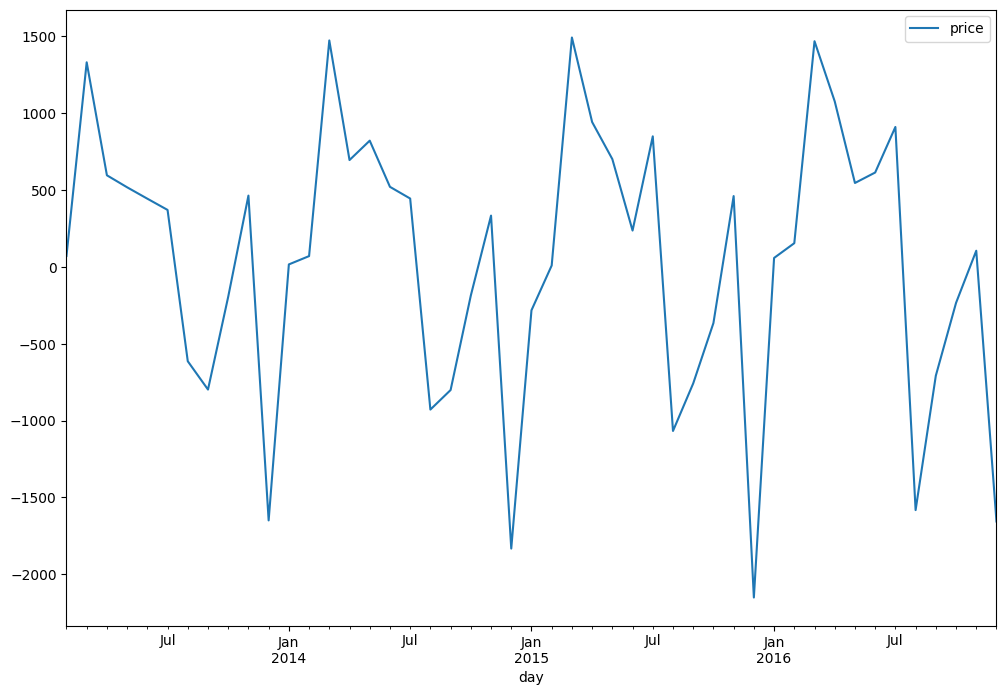

In [31]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

diff_data = training.diff(1) # 1차 차분
diff_data = diff_data.dropna()
diff_data.plot()

In [32]:
adf = adfuller(diff_data)
print('ADF Statistic: {}'.format(adf[0]))
print('p-value : {}'.format(adf[1]))
# p-value e-22으로 유의수준 0.05보다 작으므로 정상성이 존재한다고 볼 수 있음

ADF Statistic: -12.094547576926423
p-value : 2.0851606399610975e-22


In [33]:
## AR 모형
# AR 모형 : 자기회귀과정이란 뜻으로 현 시점의 데이터를 이전의 데이터들의 상관성으로 나타내는 모형
# 최적의 성능을 가지는 모델을 만들 수 있는 과거의 값을 찾게 되는데, 이값을 p라고 하며 AR(p) 모형이라고 한다.
# ACF : ACF는 자기상관 함수로 시차에 따른 자기상관성을 의미. ACF 값을 시차에 따른 그래프로 시각화를 해보면, 최적의 p값을 찾을 수 있음.

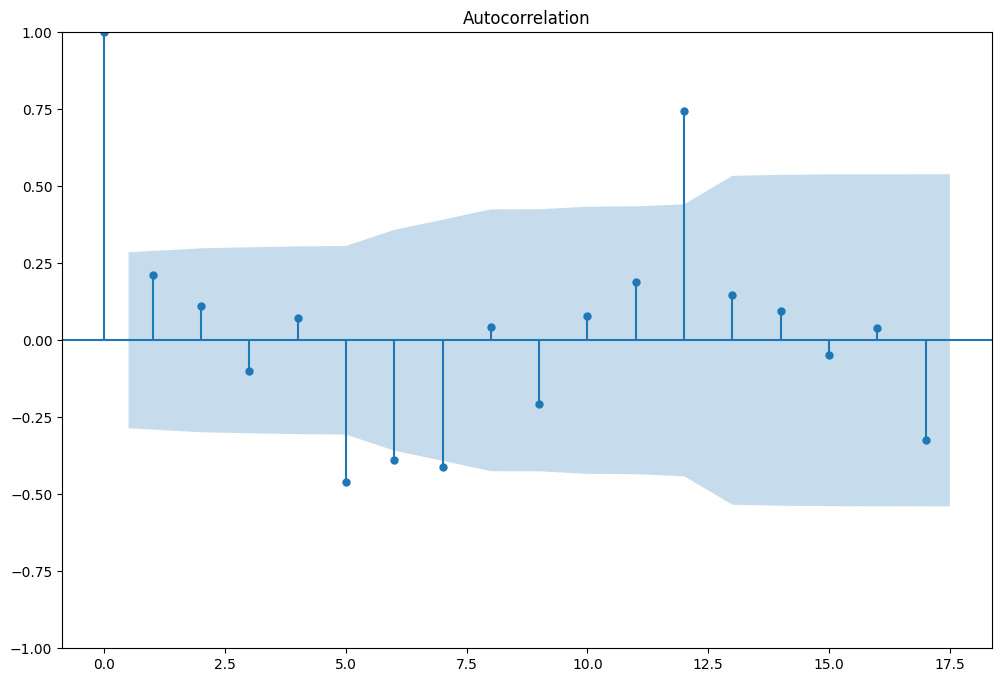

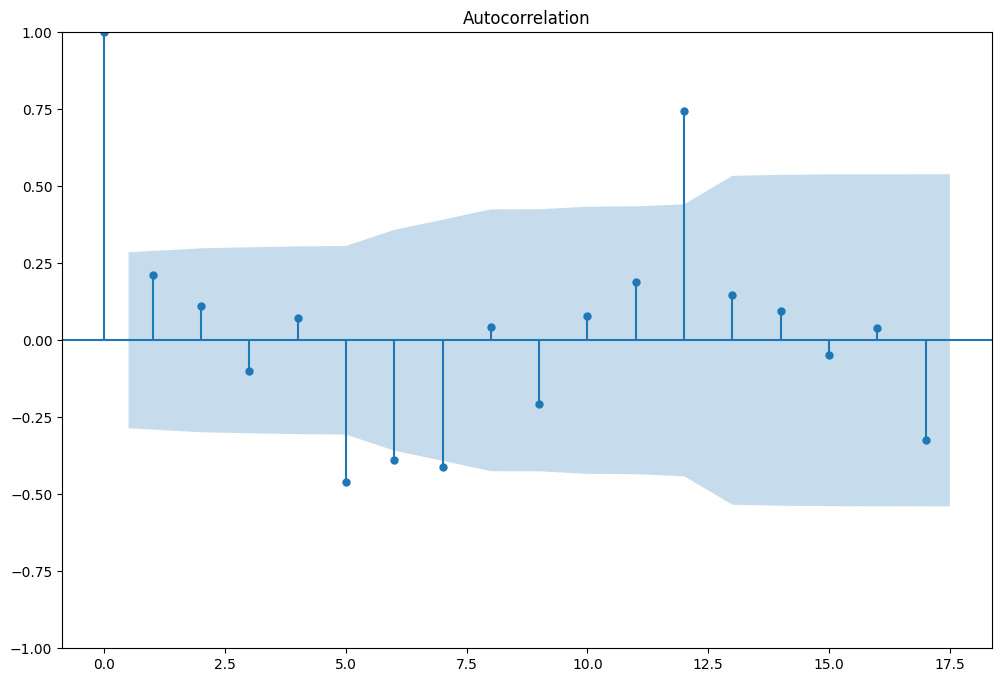

In [34]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

plot_acf(diff_data) #AR(p)의 값 확인 가능

In [35]:
## MA 모형
# MA 모형 : 과거의 예측 오차들의 가중이동편균으로 현재 시점의 데이터를 표현하는 모형. 즉, 과거의 예측 오차를 이용하여 미래를 예측하는 모형
# MA 모형은 최적의 모형이 되는 구간을 구하는 것이 중요하다. MA 모형이 최적이 되게끔 하는 변수 값이 q이며 이 모형을 MA(q) 모형이라 한다.
# PACF : PACF는 편자기상관 함수이다. PACF는 시차가 다른 두 시계열 데이터 간의 순수한 상호 연관성. PACF는 값이 0에 수렴할 때 q값을 MA모형으로 q값으로 설정.

c:\Users\신주현\AppData\Local\Programs\Python\Python37\lib\site-packages\statsmodels\graphics\tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


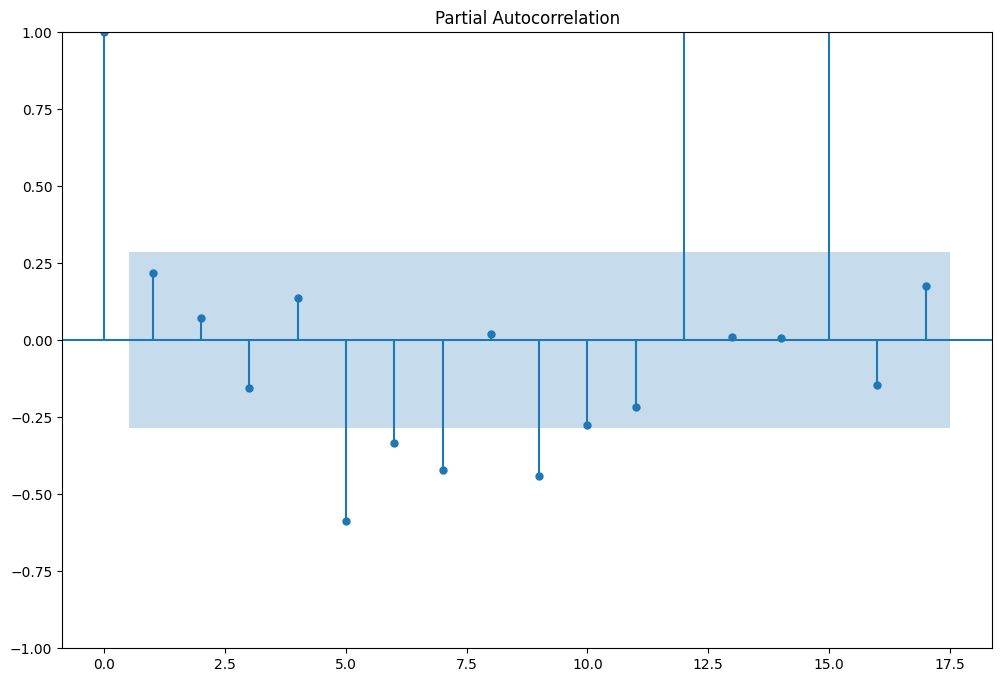

In [36]:
plot_pacf(diff_data) #MA(q)의 값 확인 가능

plt.show()

In [53]:
# 1차분 데이터를 넣고 ARIMA 분석 실행
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(diff_data, order=(2,0,2),trend='ct')
res = model.fit()
res.summary()

c:\Users\신주현\AppData\Local\Programs\Python\Python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\신주현\AppData\Local\Programs\Python\Python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\신주현\AppData\Local\Programs\Python\Python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\신주현\AppData\Local\Programs\Python\Python37\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\신주현\AppData\Lo

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  price   No. Observations:                   47
Model:                 ARIMA(2, 0, 2)   Log Likelihood                -375.718
Date:                Sun, 21 May 2023   AIC                            765.436
Time:                        19:47:03   BIC                            778.387
Sample:                    02-01-2013   HQIC                           770.309
                         - 12-01-2016                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        273.8815    359.431      0.762      0.446    -430.590     978.353
x1            -9.5277     11.976     -0.796      0.426     -33.000      13.944
ar.L1         -1.3214      0.251     -5.265      0.000      -1.813      -0.829
ar.L2         -0.3241      0.254     -1.276      0.202      -0.822       0.174
ma.L1          1.9429      0.255      7.607      0.000       1.442       2.444
ma.L2          0.9696      0.257      3.777      0.000       0.466       1.473
sigma2      4.539e+05      0.137   3.32e+06      0.000    4.54e+05    4.54e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.07   Jarque-Bera (JB):                 0.18
Prob(Q):                              0.79   Prob(JB):                         0.91
Heteroskedasticity (H):               1.40   Skew:                            -0.15
Prob(H) (two-sided):                  0.51   Kurtosis:                         3.00
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.78e+22. Standard errors may be unstable.
"""

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(training, order=(2,1,2),trend='ct')
res = model.fit()
res.summary()
# 차분 실행시 Error 발생
# 값 오류: 적분('d > 0') 또는 계절 적분('D > 0')이 있는 모델에서는 "d + D"보다 낮은 차수의 추세 항은 (차분 연산으로 인해 제거될 것이기 때문에) 될 수 없습니다. 
# 예를 들어 ARIMA(1, 1, 1) 모형에는 상수를 포함할 수 없지만, 서로 다른 데이터에 상수를 적합시키는 것과 동일한 효과를 갖는 선형 추세를 포함할 수 있습니다.

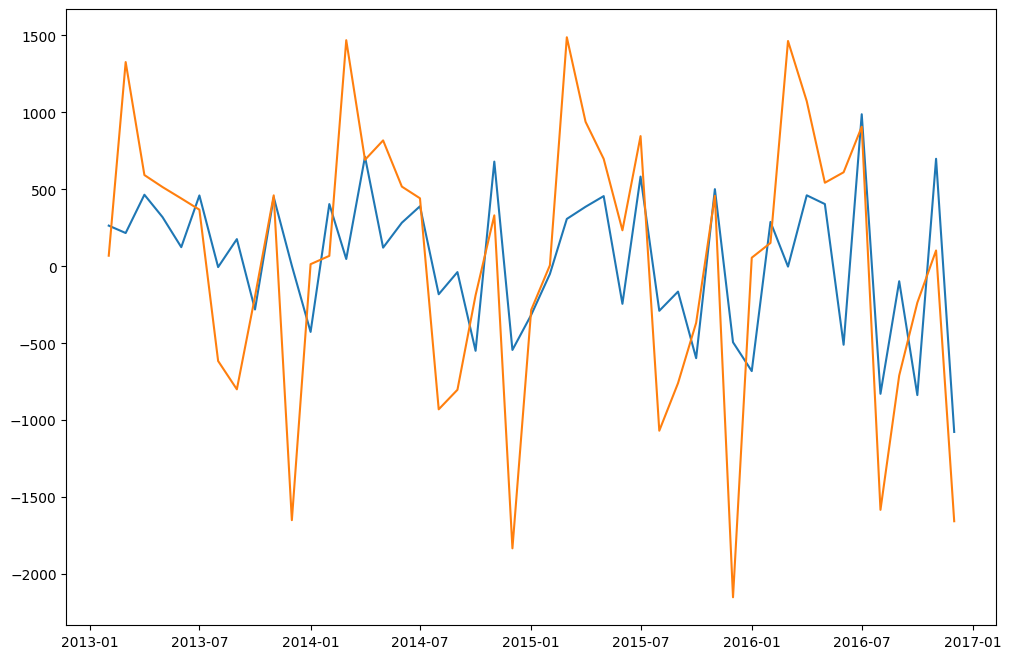

In [58]:
plt.plot(res.predict())
plt.plot(diff_data)

<AxesSubplot:xlabel='day'>

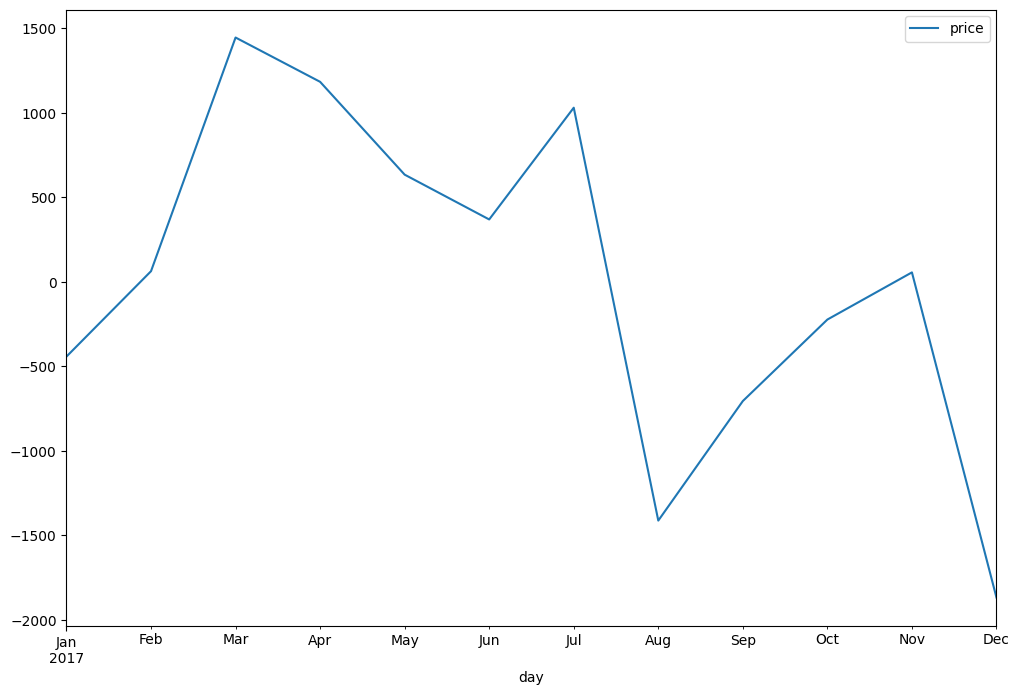

In [64]:
# Train, Test 데이터 생성
training2 = data[:"2016-11-01"]
test2 = data.drop(training2.index)

diff_data_test2 = test2.diff(1) # 1차 차분
diff_data_test2 = diff_data_test2.dropna()
diff_data_test2.plot()

In [65]:
forecast_data = res.forecast(steps=len(diff_data_test2), alpha=0.05) 
# 학습 데이터셋으로부터 test 데이터 길이만큼 예측합니다.

pred_y= forecast_data
pred_y

2017-01-01      4.912137
2017-02-01   -513.676379
2017-03-01    160.229445
2017-04-01   -587.418789
2017-05-01    156.924362
2017-06-01   -609.562994
2017-07-01    136.845815
2017-08-01   -626.265361
2017-09-01    115.012586
2017-10-01   -642.412752
2017-11-01     93.014692
2017-12-01   -658.522420
Freq: MS, Name: predicted_mean, dtype: float64

In [66]:
test_y = diff_data_test2 # 실제 데이터
test_y

,price
day,
2017-01-01,-442.0
2017-02-01,63.0
2017-03-01,1445.0
2017-04-01,1183.0
2017-05-01,634.0
2017-06-01,369.0
2017-07-01,1030.0
2017-08-01,-1412.0
2017-09-01,-705.0


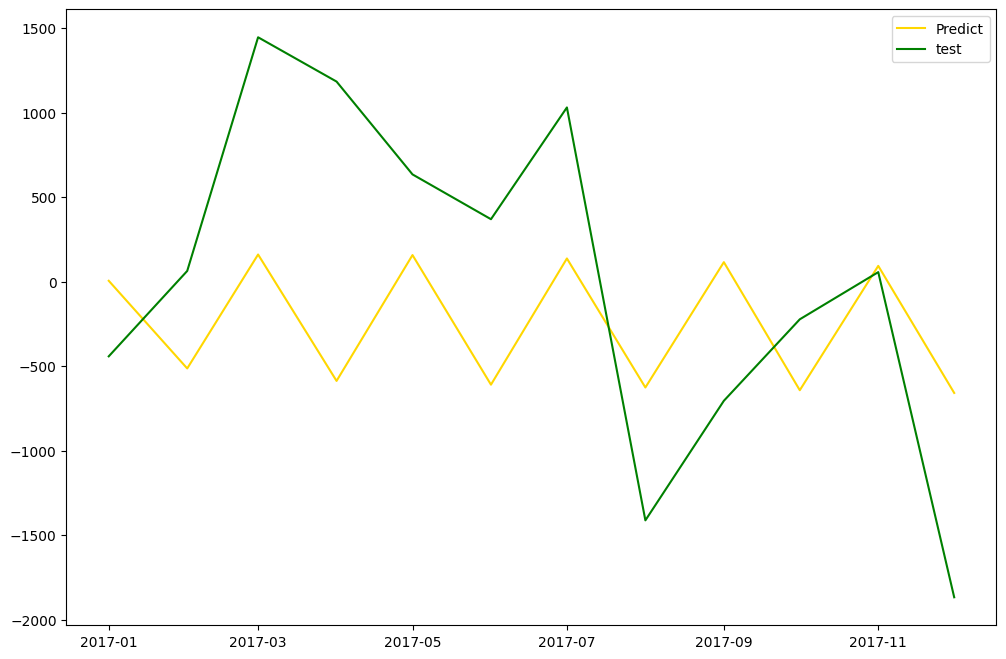

In [67]:
plt.plot(pred_y, color="gold", label='Predict') # 모델이 예상한 가격 그래프
plt.plot(test_y, color="green" , label='test') # 실제 가격 그래프
plt.legend()
plt.show()


In [68]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

print("r2_score : ", r2_score(test_y, pred_y))
RMSE = mean_squared_error(test_y, pred_y)**0.5
print("RMSE : " , RMSE)
# r2_score 0.095로 잘못된 분석

r2_score :  0.09599347859492824
RMSE :  923.2059193492714


In [69]:
## 7.8.5 SARIMA
# 계절성까지 고려한 ARIMA
from pmdarima import auto_arima
auto_model = auto_arima(training, start_p=0, d=1, start_q=0,
                        max_p=3, max_q=3, 
                        start_P=0, start_Q=0,
                        max_P=3, max_Q=3, m=12,
                        seasonal=True, information_criterion='aic',
                        trace=True)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=481.846, Time=0.02 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=482.652, Time=0.07 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=482.466, Time=0.08 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=483.637, Time=0.06 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=483.669, Time=0.04 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=inf, Time=0.17 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=481.031, Time=0.03 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=482.740, Time=0.10 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=0.29 sec
 ARIMA(2,1,0)(0,1,0)[12]             : AIC=482.616, Time=0.04 sec
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=482.682, Time=0.09 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=480.687, Time=0.03 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=482.403, Time=0.09 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=inf, Time=0.42 sec
 ARIMA(0,1,2)(0,1,0)[12]             : AIC=48

In [70]:
# ARIMA(0,1,1)(0,1,0)[12] 을 최적의 모델로 선정
auto_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                   48
Model:             SARIMAX(0, 1, 1)x(0, 1, [], 12)   Log Likelihood                -238.344
Date:                             Sun, 21 May 2023   AIC                            480.687
Time:                                     19:56:25   BIC                            483.798
Sample:                                 01-01-2013   HQIC                           481.761
                                      - 12-01-2016                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3185      0.177     -1.801      0.072      -0.665       0.028
sigma2      4.803e+04   1.64e+04      2.924      0.003    1.58e+04    8.02e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 1.15
Prob(Q):                              0.95   Prob(JB):                         0.56
Heteroskedasticity (H):               1.56   Skew:                            -0.14
Prob(H) (two-sided):                  0.45   Kurtosis:                         2.16
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [71]:
# 학습 데이터셋으로부터 test 데이터 길이만큼 예측
auto_pred_y= pd.DataFrame(auto_model.predict(n_periods=len(test)), 
                          index=test.index) 
auto_pred_y.columns = ['predicted_price']
auto_pred_y

,predicted_price
day,
2017-01-01,5609.436977
2017-02-01,5761.436977
2017-03-01,7225.436977
2017-04-01,8298.436977
2017-05-01,8841.436977
2017-06-01,9452.436977
2017-07-01,10359.436977
2017-08-01,8777.436977
2017-09-01,8068.436977


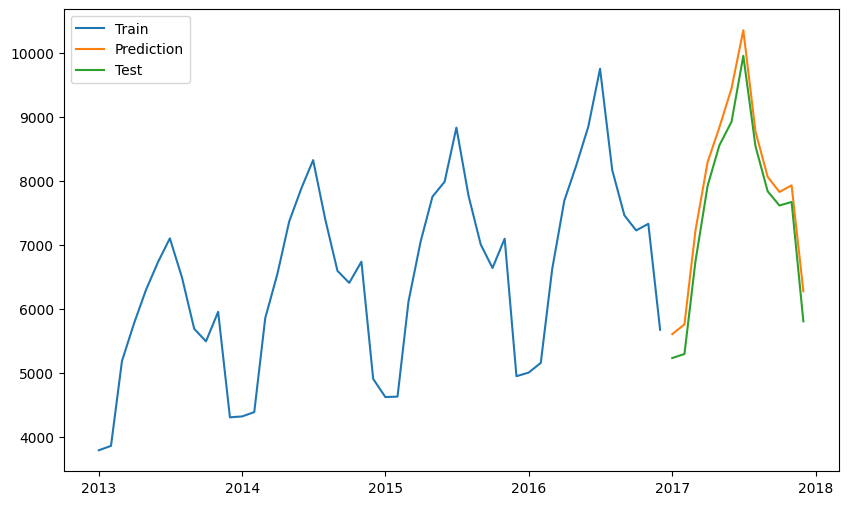

In [72]:
plt.figure(figsize=(10,6))
plt.plot(training, label="Train") # Train 데이터 
plt.plot(auto_pred_y, label="Prediction") # 모델이 예상한 그래프 
plt.plot(test, label="Test") # 실제 가격 그래프 
plt.legend(loc='upper left')
plt.show()

In [75]:
test_y = test # 실제 데이터

In [76]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

print("r2_score : ", r2_score(test_y, auto_pred_y))
RMSE = mean_squared_error(test_y, auto_pred_y)**0.5
print("RMSE : " , RMSE)
# R2 0.93으로 93%정도의 모델 정확도를 가지고 예측 할 수 있음.
# 높은 분석 모델 정확도로 시간의 추세와 계절성을 가지고 예측할 수 있다고 볼 수 있음

r2_score :  0.9305467067543264
RMSE :  373.20642594043227


In [ ]:
# 시계열 데이터 보간 자료
# https://rfriend.tistory.com/682